# Week 14 Activity

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [75]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [76]:
%whos

Variable                      Type              Data/Info
---------------------------------------------------------
IQR                           float64           19445.0
KMeans                        type              <class 'sklearn.cluster._kmeans.KMeans'>
Q1                            float64           3355.0
Q2                            float64           9960.0
Q3                            float64           22800.0
StandardScaler                type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
Underdeveloped_AHCcluster     DataFrame                           country<...>       1              1  
Underdeveloped_KMeancluster   DataFrame                           country<...>       1              1  
Underdeveloped_countries      DataFrame                           country<...>       1              1  
Underdevelopedcountry         DataFrame                           country<...>       1              1  
ax                            ndarray           9: 9 

In [77]:
# Initial level of investigation 
# Dimensions of the data
data.shape 

(167, 10)

In [78]:
# print the columns/features of the data
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [79]:
# Basic info of the dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [80]:
# Checking non null values in each column
data.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [81]:
# Returns range, column, number of non-null objects of each column, datatype and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [82]:
# Checking null values for each columns
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [83]:
# 'exports', 'health', 'imports' are given in percentage of gdpp. Converting those percentages to absolute values.
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


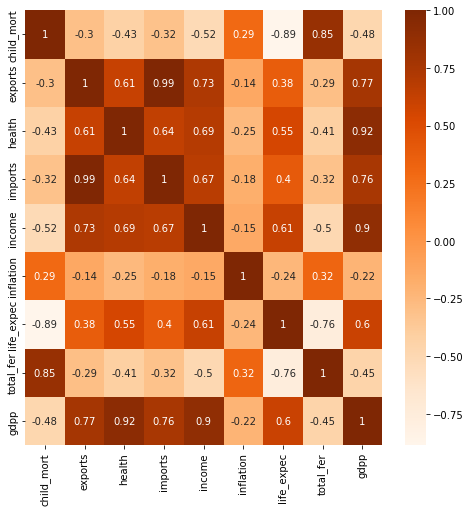

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True,cmap='Oranges')
plt.show()

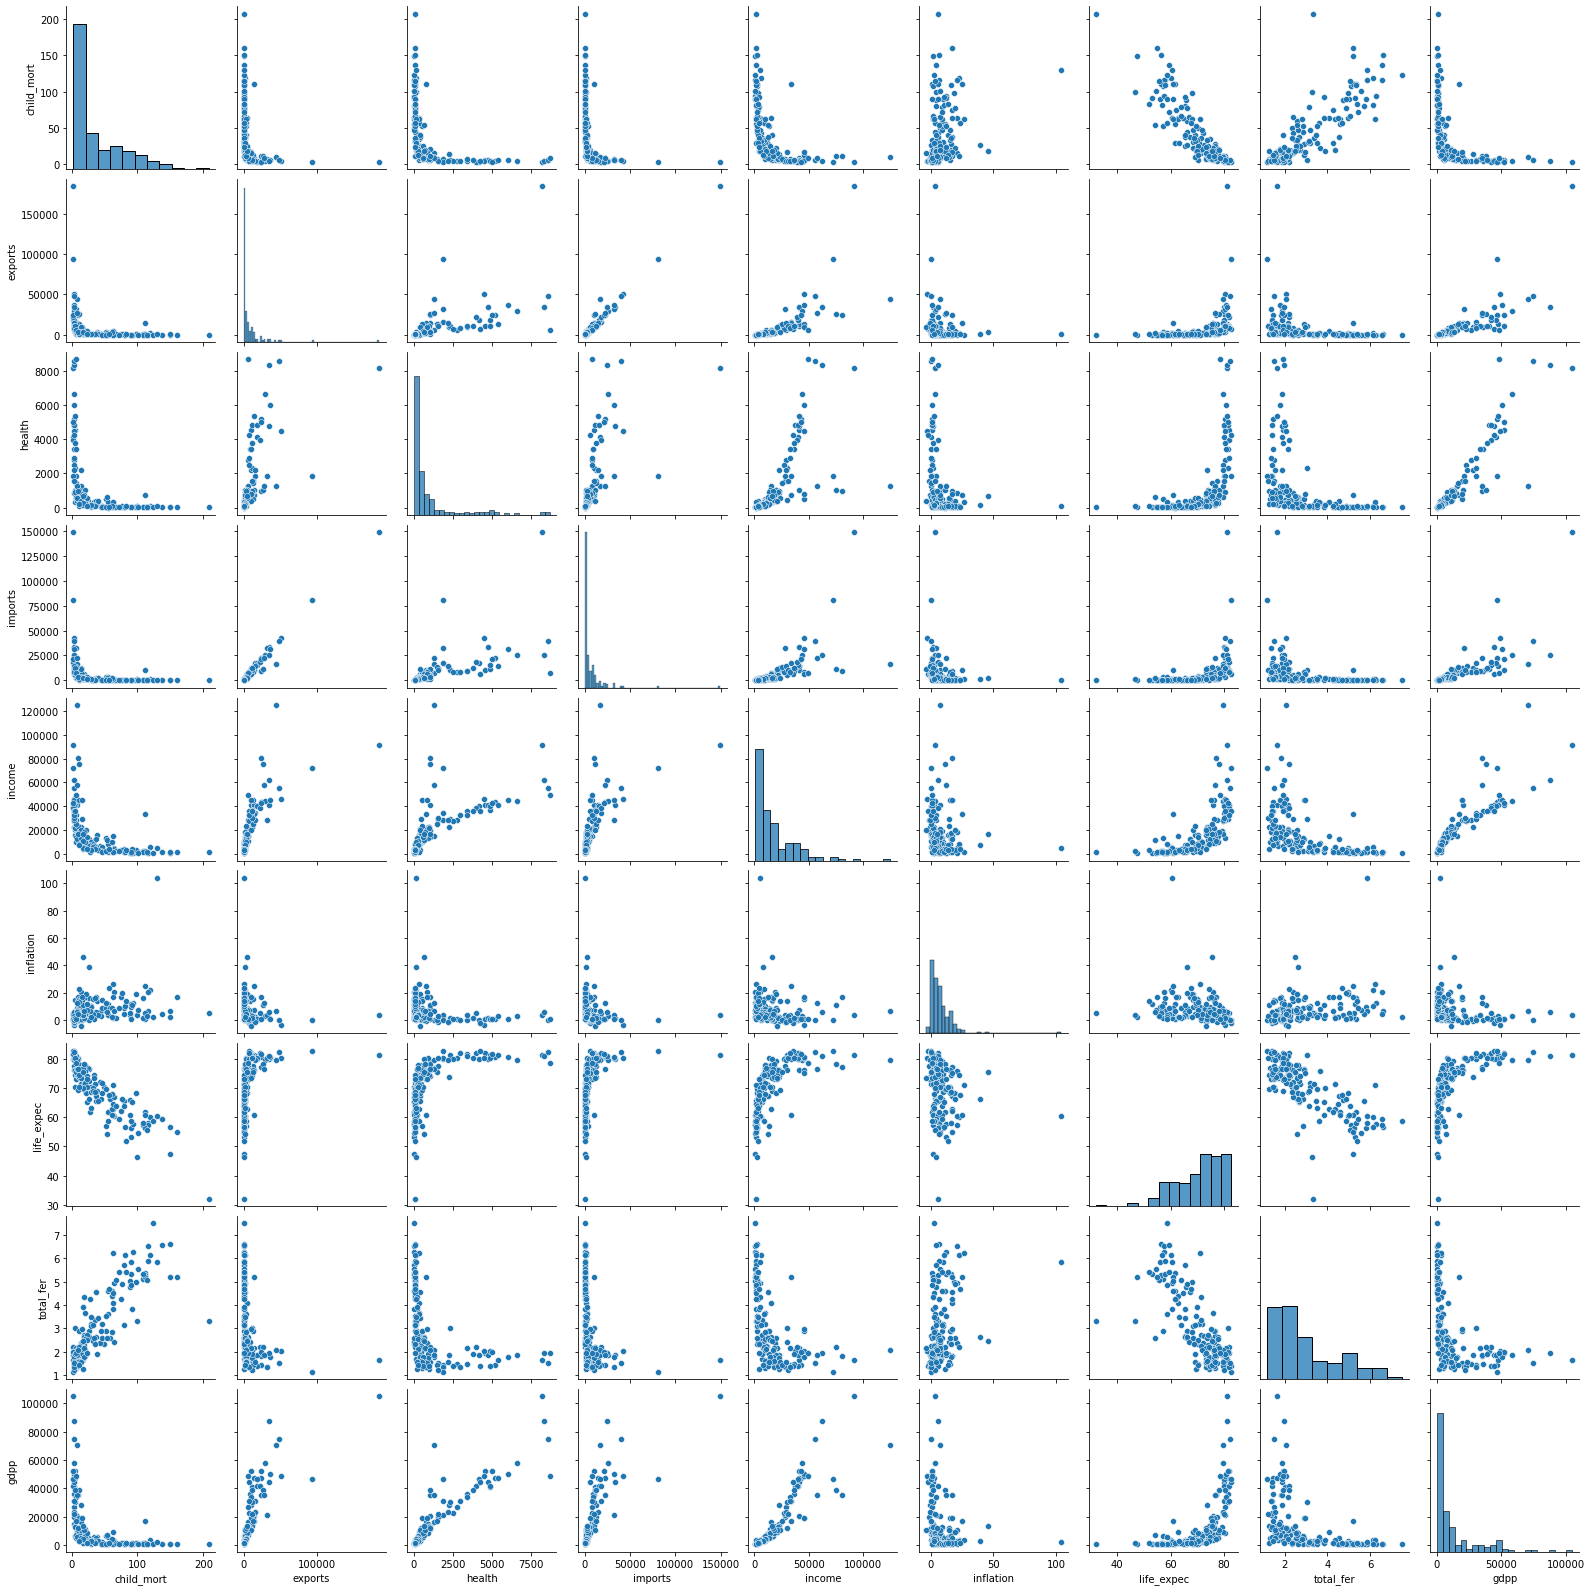

In [88]:
sns.pairplot(data)
plt.show()

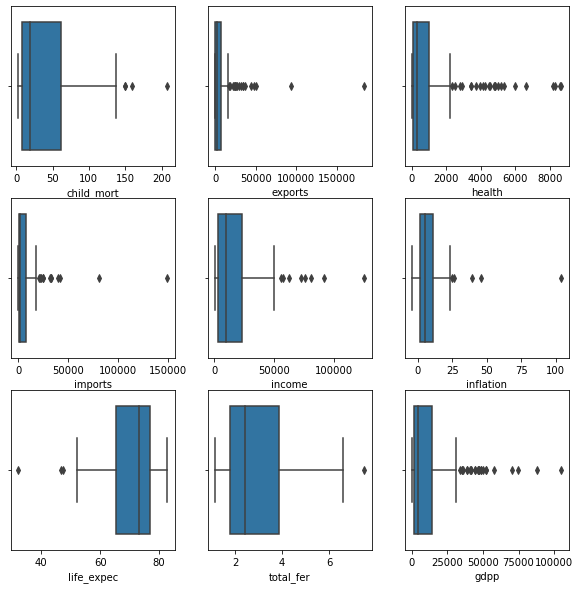

In [89]:
#Outlier Detection and Handling
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(10,10))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [90]:
#Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' are at critical socio-economic and health conditions
#Outliers for exports, imports, health, income features are mostly developed countries with better socio-economic and health conditions than rest

data1=data.copy()
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [91]:
#Exports

Q1 = data1['exports'].quantile(0.25)
Q2 = data1['exports'].quantile(0.50)
Q3 = data1['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['exports']=np.where(data1['exports']>upper_limit,upper_limit,np.where(data1['exports']<lower_limit,lower_limit,data1['exports']))

In [92]:
# Imports

Q1 = data1['imports'].quantile(0.25)
Q2 = data1['imports'].quantile(0.50)
Q3 = data1['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['imports']=np.where(data1['imports']>upper_limit,upper_limit,np.where(data1['imports']<lower_limit,lower_limit,data1['imports']))

In [93]:
# Health

Q1 = data1['health'].quantile(0.25)
Q2 = data1['health'].quantile(0.50)
Q3 = data1['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['health']=np.where(data1['health']>upper_limit,upper_limit,np.where(data1['health']<lower_limit,lower_limit,data1['health']))

In [94]:
# Income

Q1 = data1['income'].quantile(0.25)
Q2 = data1['income'].quantile(0.50)
Q3 = data1['income'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
data1['income']=np.where(data1['income']>upper_limit,upper_limit,np.where(data1['income']<lower_limit,lower_limit,data1['income']))

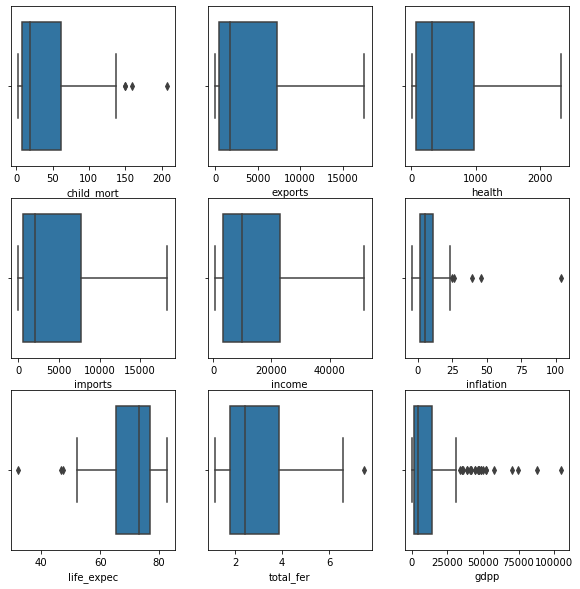

In [95]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(10,10))
ax=ax.flatten()
int_cols= data1.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data1[i], ax=ax[x])
plt.show()

In [96]:
# DataSet Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1.iloc[:,1:])

In [97]:
# K-Means Clustering

from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
inertia

[1503.0,
 740.6523357173688,
 467.35189412132473,
 388.40739282260796,
 332.0072623778184,
 287.7339254795492,
 262.01311429882213,
 234.58814649187713,
 210.04442124853605,
 193.65853796547424]

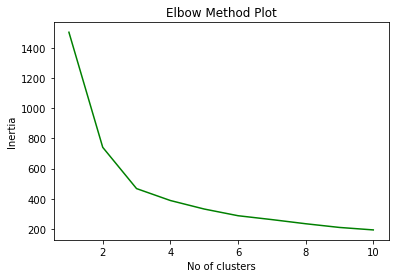

In [101]:
plt.plot(ks,inertia, color='green')
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [102]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[2 0 0 2 0 0 0 1 1 0 1 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 1 2 0 0 0 0 0 1 1 0 0 2 0 1 2 0 0 2 1 1 1 2 0 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2]


In [103]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID
0,Afghanistan,90.2,55.0,42.0,248.0,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.0,268.0,1988.0,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1713.0,186.0,1400.0,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.0,101.0,1514.0,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100.0,1.44,76.8,2.13,12200,0


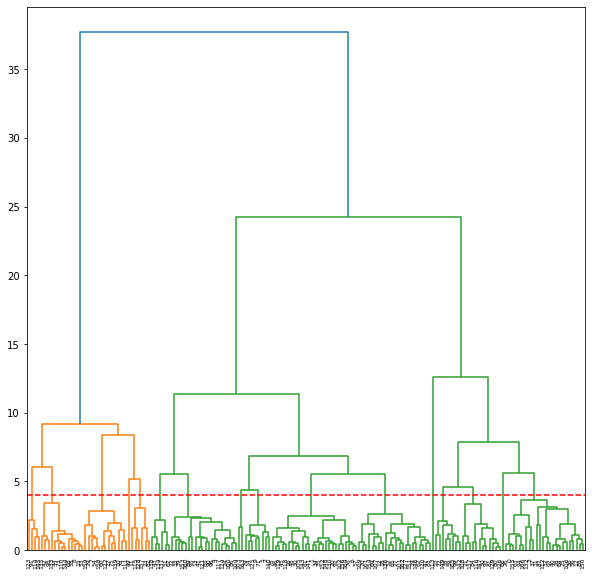

In [104]:
# Agglomerative Heirarchial Clustering

from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (10,10))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [105]:
model_kmeans = KMeans(n_clusters=3,max_iter=50,random_state = 50)
model_kmeans.fit(scaled_data)
labels_sc = model_kmeans.predict(scaled_data)
print(labels_sc)

[0 1 1 0 1 1 1 2 2 1 2 2 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 1 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 2 0 1 1 1 1 1 2 2 1 1 0 1 2 0 1 1 0 2 2 2 0 1 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [106]:
data1['AHC_ClusterID']= pd.Series(labels_sc)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_ClusterID,AHC_ClusterID
0,Afghanistan,90.2,55.0,42.0,248.0,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.0,268.0,1988.0,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1713.0,186.0,1400.0,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.0,101.0,1514.0,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100.0,1.44,76.8,2.13,12200,0,1


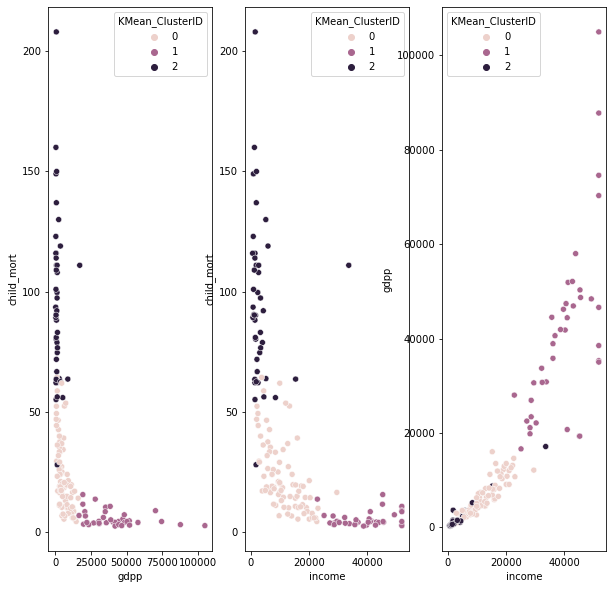

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'KMean_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'KMean_ClusterID')
plt.show()

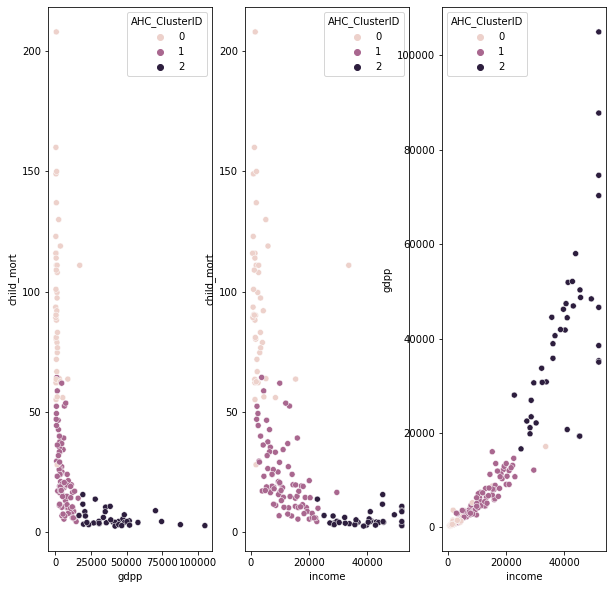

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,2)
sns.scatterplot(x = 'income', y = 'child_mort', data= data1, hue = 'AHC_ClusterID')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'gdpp', data= data1, hue = 'AHC_ClusterID')
plt.show()

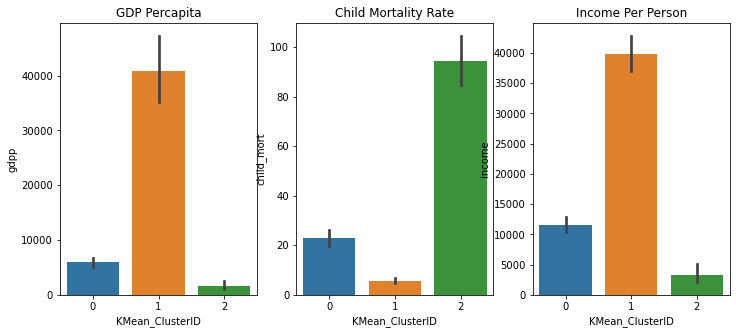

In [114]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()

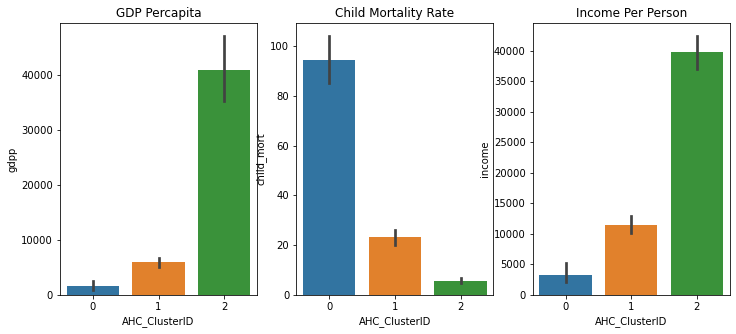

In [115]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot(x = 'AHC_ClusterID', y = 'gdpp', data= data1)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'AHC_ClusterID', y = 'child_mort', data= data1)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'AHC_ClusterID', y = 'income', data= data1)
plt.title('Income Per Person')
plt.show()

In [116]:
Underdeveloped_KMeancluster = data1[data1['KMean_ClusterID']== 1]
Underdeveloped_countries  = Underdeveloped_KMeancluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])
Underdeveloped_countries['country'].values

array(['Slovak Republic', 'Oman', 'Saudi Arabia', 'Czech Republic',
       'Bahrain', 'Malta', 'South Korea', 'Portugal', 'Slovenia',
       'Greece', 'Bahamas', 'Israel', 'Spain', 'Cyprus', 'New Zealand',
       'United Arab Emirates', 'Brunei', 'Italy', 'Kuwait',
       'United Kingdom', 'France', 'Germany', 'Iceland', 'Belgium',
       'Japan', 'Finland', 'Singapore', 'Austria', 'Canada',
       'United States', 'Ireland', 'Netherlands', 'Australia', 'Sweden',
       'Denmark', 'Qatar', 'Switzerland', 'Norway', 'Luxembourg'],
      dtype=object)

In [117]:
Underdeveloped_AHCcluster = data1[data1['AHC_ClusterID']== 1]
Underdevelopedcountry  = Underdeveloped_AHCcluster.sort_values(by = ['gdpp','income','child_mort'],ascending=[True, True, False])
Underdevelopedcountry['country'].values

array(['Nepal', 'Tajikistan', 'Bangladesh', 'Cambodia', 'Kyrgyz Republic',
       'Myanmar', 'Vietnam', 'India', 'Uzbekistan', 'Moldova', 'Bolivia',
       'Philippines', 'Bhutan', 'Egypt', 'Mongolia', 'Sri Lanka',
       'Morocco', 'Guatemala', 'Micronesia, Fed. Sts.', 'Georgia',
       'Vanuatu', 'Ukraine', 'El Salvador', 'Guyana', 'Indonesia',
       'Armenia', 'Paraguay', 'Cape Verde', 'Samoa', 'Tonga', 'Fiji',
       'Jordan', 'Albania', 'Tunisia', 'Belize', 'Turkmenistan',
       'Algeria', 'Iraq', 'Macedonia, FYR', 'China',
       'Bosnia and Herzegovina', 'Ecuador', 'Jamaica', 'Peru', 'Thailand',
       'Serbia', 'Dominican Republic', 'Azerbaijan', 'Belarus',
       'St. Vincent and the Grenadines', 'Colombia', 'Botswana', 'Iran',
       'Montenegro', 'Bulgaria', 'Maldives', 'South Africa', 'Grenada',
       'Mauritius', 'Panama', 'Costa Rica', 'Romania', 'Suriname',
       'Lebanon', 'Kazakhstan', 'Malaysia', 'Argentina', 'Turkey',
       'Russia', 'Seychelles', 'Brazil', 'Lat

In [118]:
# From the above observations, it can be concluded that the  final model we are opting is Agglomerative Hierarchical Clustering model.
# The countries that need aid are mentioned above.